# <center>R2.08 - Outils numériques pour les statistiques descriptives <br> TP2 - Introduction à Panda<center>


_Tom Ferragut, Thibault Godin_

_IUT de Vannes, BUT Informatique_

**Document pouvant être utile :**
-  [<font style="color:blue">Le GitHub du livre "Python pour le data scientist"</font>](https://github.com/emjako/pythondatascientist)

### Imports

In [8]:
# importation des packages
import numpy as np
import pandas as pd # Nous utiliserons uniquement la classe DataFrame et non la classe Series


# importation des modules
import matplotlib.pyplot as plt
import scipy.stats as sps

## 1 - Dataframes

### 1.b - Tableau de données

L'objectif de cette partie est de se familiariser avec les fonctions de bases du package **Panda**. Cela se fera partiellement en autonomie, vous devrez utiliser la documentation de **Panda** (ou le lien donné en introduction) pour trouver comment utiliser certaines fonctions.

>__Question 1 :__ Grâce à la fonction `pd.read_csv`, charger les données du fichier **vgsalesGlobale.csv** dans un DataFrame que l'on appellera "games". Puis exécuter la fonction : `games.head()`, que fait cette fonction ? 

La commande `games.head()` permet d'afficher les premières lignes du tableau (5 premières lignes).

In [12]:
games =pd.read_csv("vgsalesGlobale.csv")

games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


>__Question 2 :__ Dans une cellule 'Markdown', lister les différentes __variables__ du tableau "games" en précisant son type : *qualitative*, *nominale*, *ordinale*, *quantitative*, *discrète*, *continue*.

__Rank__ : quantitative *discrète*  
__Name__ : qualitative *nominale*  
__Platform__ : qualitative *nominale*  
__Year__ : quantitative *discrète*  
__Platform__ : qualitative *nominale*  
__Publisher__ : qualitative *nominale*  
__NA_Sales__ : quantitative *continue*  
__EU_Sales__ : quantitative *continue*  
__JP_Sales__ : quantitative *continue*  
__Other_Sales__ : quantitative *continue*  
__Global_Sales__ : quantitative *continue*  

Dans la question suivante nous nous concentrons sur la variable "Genre" des données "games". 

>__Question 3 :__ En vous aidant de la documentation de panda, et plus particulièrement des méthodes `value_count` et `unique`, réaliser la liste des actions suivantes :
> - Afficher la liste des variables
> - Afficher l'effectif de chaque modalité de la variable "Platform" dans l'ordre croissant.
> - Afficher la fréquence de chaque modalité de la variable "Publisher".
> - Afficher la liste et le nombre de modalités de la variable "Genre" 

In [57]:
print([games.columns[i] for i in range(0, len(games.columns))])

print(games.Platform.value_counts(ascending=True))

print(games.Publisher.value_counts(normalize=True))

print(games.Genre.unique())
print(games.Genre.nunique())

## Help ##
#print(games.columns,end='\n\n')
#print(games.Platform.value_counts(ascending=True),end='\n\n')

['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
Platform
PCFX       1
GG         1
TG16       2
3DO        3
WS         6
SCD        6
NG        12
GEN       27
DC        52
NES       98
GB        98
2600     133
WiiU     143
SAT      173
XOne     213
SNES     239
N64      319
PS4      336
PSV      413
3DS      509
GC       556
GBA      822
XB       824
PC       960
PS      1196
PSP     1213
X360    1265
Wii     1325
PS3     1329
PS2     2161
DS      2163
Name: count, dtype: int64
Publisher
Electronic Arts                 0.081681
Activision                      0.058948
Namco Bandai Games              0.056348
Ubisoft                         0.055683
Konami Digital Entertainment    0.050302
                                  ...   
Warp                            0.000060
New                             0.000060
Elite                           0.000060
Evolution Games                 0.000060
UIG Entertainmen

__Remarque :__ La fonction games.Genre.value_counts() correspond au **tableau agrégé** de la variable "Genre". 

### 1.b - Représentation graphique

À partir de ces tableaux nous pouvons dés à présent tracer des diagrammes grâce notamment à la méthode `plot`, voici un exemple :

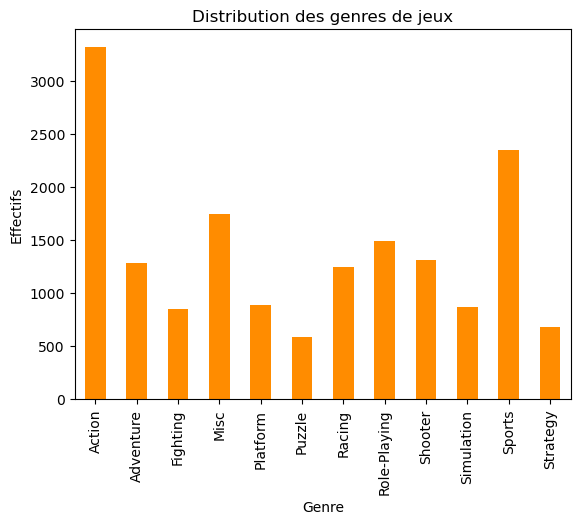

In [42]:
# Commande principale qui créer le diagramme. La fonction `sort_index` est là pour ordonner par ordre alphabétique le "Genre"
games.Genre.value_counts().sort_index().plot(kind="bar", color='darkorange')

# Ajoute des étiquettes et un titre au graphique, cette partie est optionnelle
plt.xlabel('Genre')
plt.ylabel('Effectifs')
plt.title('Distribution des genres de jeux')

# Affichez le graphique
plt.show()

>__Question 4 :__ Représenter graphiquement, avec le diagramme le plus adapté, la distribution des jeux selon la **plateforme** et selon l'**année de publication**. Expliquer votre choix dans chacun des cas.

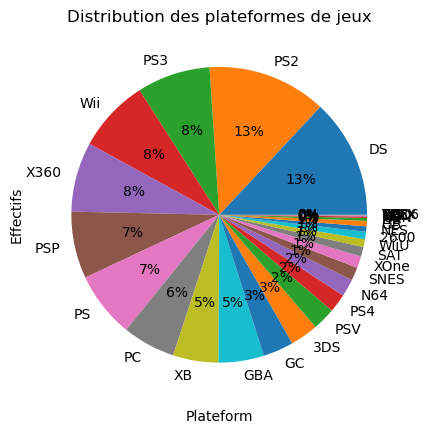

In [75]:
# Platform diagram
# J'ai choisi le camembert car on recherche sur quelle plateforme c'est le plus distribué et comme cela
# on voit mieux je trouve (même si certaine plateforme non)
games.Platform.value_counts().plot(kind="pie", autopct='%1.0f%%')

plt.xlabel('Plateform')
plt.ylabel('Effectifs')
plt.title('Distribution des plateformes de jeux')

plt.show()

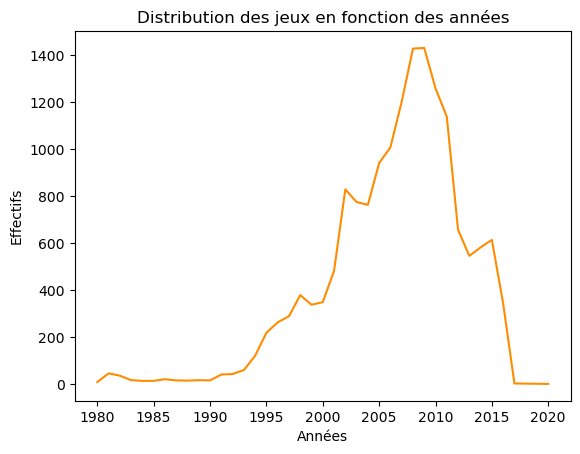

In [67]:
# Year diagram
# J'ai choisi diagramme en courbe car on voit bien le moment ou la distribution à exploser
games.Year.value_counts().sort_index().plot(color='darkorange')

plt.xlabel('Années')
plt.ylabel('Effectifs')
plt.title('Distribution des jeux en fonction des années')

plt.show()

>__Question 5 :__ En utilisant la méthode `plt.bar` de __matplotlib__, représenter graphiquement l'évolution de la vente globale de jeux vidéos depuis 1980.

KeyboardInterrupt: 

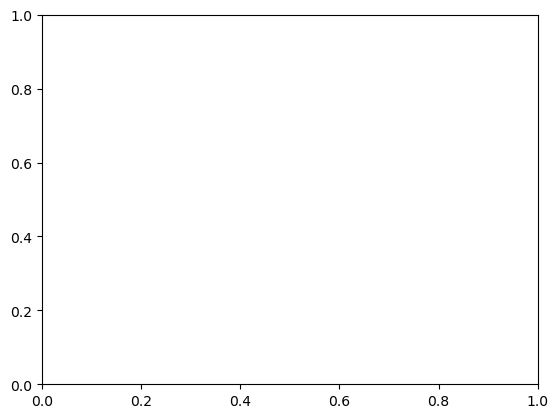

In [89]:
 # Évolution de `Global_Sales` selon `Year`
    
#TODO

plt.bar(games.Year, games.Global_Sales, color = 'black')

plt.xlabel('Années')
plt.ylabel('Effectifs')
plt.title('Distribution des jeux en fonction des années')

plt.show()

In [90]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.

    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).

    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.

    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.

    height : float or array-like
        The height(s) of the bars.

    width : float or array-like, default: 0.8
        The width(s) of the bars.

    bottom : float or array-like, default: 0
        The y coordinate(s) of the bottom side(s) of the bars.

    align : {'center', 'edge'}, default: 'center'
        Alignment of the bars to the *x* coordinates:

        - 'center':

### Histogrammes

Les histogrammes sont des représentations graphiques qui permettent de visualiser la distribution d'une __variable continue__, ces diagrammes sont utiles pour comprendre la répartition des différentes valeurs que prend une variable. Plus précisément :

- __Composants :__ Il est composé de rectangles adjacents, où chaque rectangle représente une plage de valeurs (bin).

- __Axe horizontal :__ L'axe horizontal représente la variable étudiée, divisée en intervalles pouvant être de largeurs distincts.

- __Axe vertical :__ L'axe vertical indique la fréquence (ou densité) des observations dans chaque intervalle, avec la hauteur du rectangle correspondante.

- __Surface des rectangles :__ La __surface__ de chaque rectangle est proportionnelle à la fréquence des observations dans la plage correspondante.

- __Interprétation :__ La __surface__ totale de tous les rectangles représente l'étendue des données et peut être interprétée comme une probabilité.

- __Utilisation :__ Utile pour visualiser la forme de la distribution des données de __variables continues__.

- __Paramètres :__ Peut être personnalisé avec des paramètres tels que le nombre de bacs (bins), le tri, et la normalisation.

>__Question 6 :__ En utilisant la méthode `plt.hist()` de __matplotlib__, tracer plusieurs histogrammes représentant les ventes globales des 50 jeux vidéos ayant le plus de ventes.

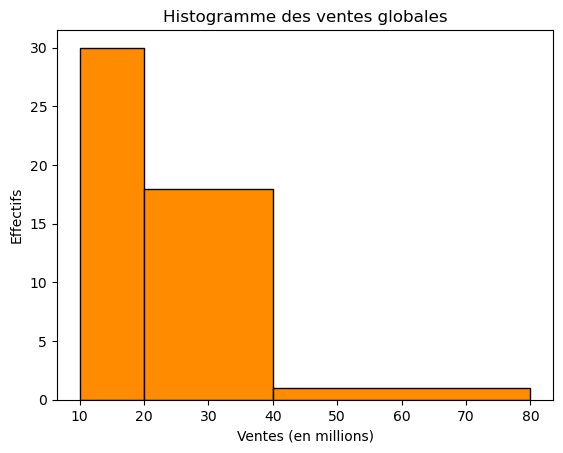

In [98]:
# Histogramme des ventes globales
plt.hist(games.head(50).Global_Sales, bins = [10,20,40,80], edgecolor = 'black', color='darkorange')

plt.xlabel('Ventes (en millions)')
plt.ylabel('Effectifs')
plt.title('Histogramme des ventes globales')

plt.show()

## 2 - Recherches et manipulations des données

Dans cette partie on se concentre sur la recherche et l'organisation de certaines données du tableau. Cela peut amener à  travailler sur un __échantillon__ de la __population__ de départ.




>__Question 7 :__ Grâce à des commande sur le __dataframe__ `games`, trouver les informations suivantes :
> - Afficher la quatrième ligne
> - Récupérer le contenu de la colonne "Platform"
> - Récupérer l'index du jeu "Mario Kart Wii"
> - Récupérer l'index de la version PC de "Portal 2"
> - Récupérer le genre du jeu "Tetris"

In [129]:
print(games.iloc[3])
print(games.Platform)
print(f"L'indice de Mario Kart Wii {games.loc[games.Name == 'Mario Kart Wii'].index[0]}")

Rank                            4
Name            Wii Sports Resort
Platform                      Wii
Year                       2009.0
Genre                      Sports
Publisher                Nintendo
NA_Sales                    15.75
EU_Sales                    11.01
JP_Sales                     3.28
Other_Sales                  2.96
Global_Sales                 33.0
Name: 3, dtype: object
0        Wii
1        NES
2        Wii
3        Wii
4         GB
        ... 
16593    GBA
16594     GC
16595    PS2
16596     DS
16597    GBA
Name: Platform, Length: 16598, dtype: object
L'indice de Mario Kart Wii 2


Voici une liste de fonctions pouvant vous être utile pour la question suivante.
- `game.loc[ games['Genre'] == "Action" ]` Donne l'échantillon contenant tous les jeux du genre "Action".
- `index` et `reset_index` Donne l'indice d'un élément dans un tableau ou réinitialise les indices du tableau.

>__Question 8 :__ Choisissez un jeu publié entre 1980 et 2020. Grâce aux fonctions précédentes, donner la position de ce jeu dans `games`, son genre, son année de publication ainsi que ses ventes globales.  
>
> Puis, créer un tableau contenant l'ensemble des jeux du même genre que le jeu choisi. __Enfin__, donner le nouveau classement de vente de votre jeu parmis les autre jeux du même genre.

In [ ]:
# Initialisation
jeu = "***"
genre = games. ...

# Tableau des jeux du même genre
.
.
.

indice = ...

print("Le rang de", jeu ,"dans la catégorie", genre ,"est", indice)